In [ ]:
# text recognition in images

# https://pypi.org/project/pytesseract/

# sudo apt install tesseract-ocr    # ubuntu
# sudo apt install tesseract-ocr-kor

# https://github.com/UB-Mannheim/tesseract/releases    # windows + PATH
# 시스템 환경변수에 C:\Program Files\Tesseract-OCR 추가

# pip install pytesseract

In [ ]:
# 언어 추가 설치

# !apt-get install tesseract-ocr-kor
# !apt-get install tesseract-ocr-eng
# !apt-get install tesseract-ocr-por

# Tesseract OCR에서 한국어(kor) 인식 기능을 사용하려면, 이 언어 데이터 파일(kor.traineddata)이 반드시 필요합니다.
# https://github.com/tesseract-ocr/tessdata/tree/main

# 리눅스에서 파일을 인터넷에서 다운로드할 때 사용하는 명령어 wget 
# !wget -O ./tessdata/eng.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/eng.traineddata?raw=true
# !wget -O ./tessdata/kor.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/kor.traineddata?raw=true
# !wget -O ./tessdata/kor_vert.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/kor_vert.traineddata?raw=true
# !wget -O ./tessdata/por.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true

In [1]:
# import libraries

import os
import pytesseract      # pip install pytesseract
import numpy as np
import cv2          # pip install opencv-python
from matplotlib import pyplot as plt
# from google.colab.patches import cv2_imshow

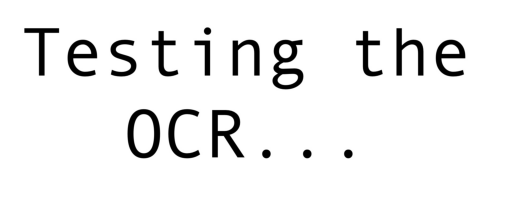

In [2]:
import cv2
from matplotlib import pyplot as plt

# read image
# print(cv2.__version__)

img = cv2.imread('./content/test01.jpg')
# cv2.imshow(img)    # .py
# cv2_imshow(img)    # colab
plt.imshow(img)
plt.axis('off')
plt.show()


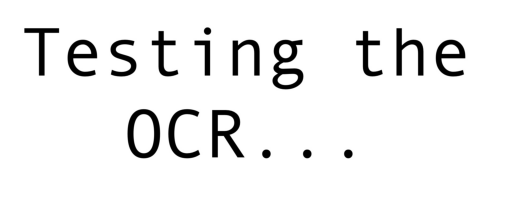

In [3]:
# OpenCV는 BGR로 되어있으니 반드시 RGB로 교체하고 사용해야한다
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)              # BGR -> RGB
# cv2.imshow(rgb)
plt.imshow(rgb)
plt.axis('off')
plt.show()

In [ ]:
# pytesseract로 RGB 이미지에서 텍스트 추출
text = pytesseract.image_to_string(rgb)  # lang='eng' or 'kor' or 'kor+kor_vert+eng'

In [7]:
print(text)

Testing the
OCR...



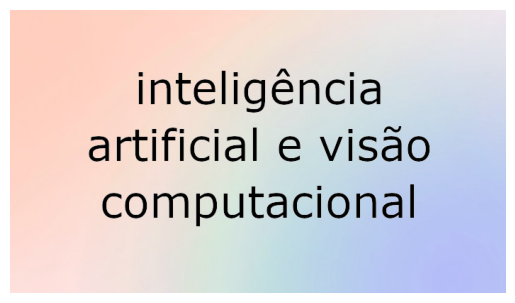

In [8]:


img = cv2.imread('./content/test02-02.jpg')
# cv2.imshow(img)
plt.imshow(img)
plt.axis('off')
plt.show()


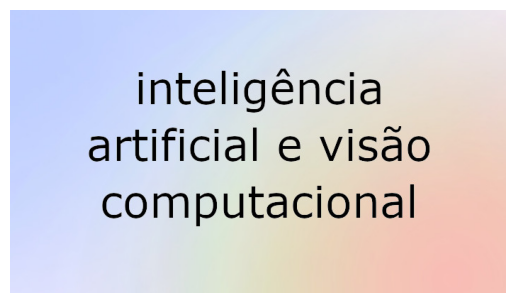

In [9]:
# OpenCV는 BGR로 되어있으니 반드시 RGB로 교체하고 사용해야한다
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# cv2.imshow(rgb)
plt.imshow(rgb)
plt.axis('off')
plt.show()

In [10]:
text = pytesseract.image_to_string(rgb)
print(text)

inteligéncia
artificial e visao
computacional



In [11]:
# able languages
!tesseract --list-langs

List of available languages in "C:\Program Files\Tesseract-OCR/tessdata/" (161):
afr
amh
ara
asm
aze
aze_cyrl
bel
ben
bod
bos
bre
bul
cat
ceb
ces
chi_sim
chi_sim_vert
chi_tra
chi_tra_vert
chr
cos
cym
dan
deu
deu_latf
div
dzo
ell
eng
enm
epo
equ
est
eus
fao
fas
fil
fin
fra
frm
fry
gla
gle
glg
grc
guj
hat
heb
hin
hrv
hun
hye
iku
ind
isl
ita
ita_old
jav
jpn
jpn_vert
kan
kat
kat_old
kaz
khm
kir
kmr
kor
lao
lat
lav
lit
ltz
mal
mar
mkd
mlt
mon
mri
msa
mya
nep
nld
nor
oci
ori
osd
pan
pol
por
pus
que
ron
rus
san
script\Arabic
script\Armenian
script\Bengali
script\Canadian_Aboriginal
script\Cherokee
script\Cyrillic
script\Devanagari
script\Ethiopic
script\Fraktur
script\Georgian
script\Greek
script\Gujarati
script\Gurmukhi
script\HanS
script\HanS_vert
script\HanT
script\HanT_vert
script\Hangul
script\Hangul_vert
script\Hebrew
script\Japanese
script\Japanese_vert
script\Kannada
script\Khmer
script\Lao
script\Latin
script\Malayalam
script\Myanmar
script\Oriya
script\Sinhala
script\Syriac
script\T

In [12]:
config_tesseract = '--tessdata-dir tessdata'
text = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(text)

inteligência
artificial e visão
computacional



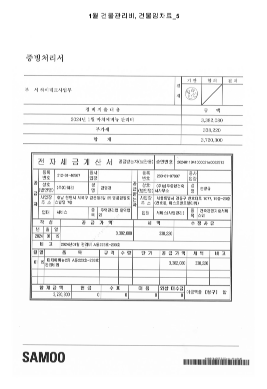

In [64]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('./quotation_line/1월 건물관리비, 건물임차료^0005.png')
img_cv = np.array(img)
gray = cv2.cvtColor(img_cv, cv2.COLOR_RGB2GRAY)         # Image 로 읽으면 RGB 순 (cv2로 읽으면 BGR순)

plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()




In [ ]:
# config_tesseract = '--tessdata-dir tessdata'
config_tesseract = '--tessdata-dir tessdata --psm 6'            # 문단
text = pytesseract.image_to_string(img, lang='kor+kor_vert+eng', config=config_tesseract)       # eng가 있어야 숫자를 더 잘 인식하는 듯?
print(text)

1월 건 물 관 리 비 , 건 물 임 자 료 5
_
증 빙 처 리 서
、 기 안 | 함 의 | 결 재
부 서 하 이 테 크 사 염 부 ‘
1 햐`0
경 비 지 출 내 용 금 액
2024 년 1월 마 치 에 비 뉴 관 리 비 3,382,080
부 가 세 338,220
합 계 3,720,300
B v fGg | | &2 [mema 8아
대세 업 장 번 호 업 장
상호 = 이 상호 ㅣ ( 주 ) 삼 무 종 합 건축
홍은 | 므 은 - e sl 으아 |
중 남 천 만 시 서 북 구 검 은 들 3 길 25 명 품 암 켈 로 흐 MEEZBA 강 동 구 천 호 대 호 1077, 19 증 ~23 증
주 소 | 스 빌 딜 ? 층 챠 주 소 |( 천 호 동 , 미 스 트 센 트 럴 타 워 )

0 N P B | 빼 Y s
"8 | 비 미 루로 | 노우 | 수 정 사 유 |
636400 콜로 로
. 비 고 Y 판 산 . . 1
g 좀 목 . | 규 격 | 수 량 미루 | 공 급 가 액 | 세 액 | 비 고 |

4 마 치 메 비 뉴 2 차 스 동 223 호 ~233 호
I 이 || | I
함 게 금 랙 | 현 금 | 수포 | 미음 98023 , o o
] , . 이 . 믹 . R
인. e
0 노 르 잉 WO G



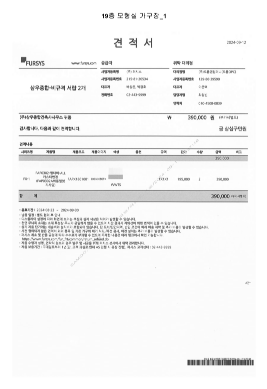

In [4]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2

img = Image.open('./quotation_noline/19층 모형실 가구장^0001.png')
img_cv = np.array(img)
gray = cv2.cvtColor(img_cv, cv2.COLOR_RGB2GRAY)         # Image 로 읽으면 RGB 순 (cv2로 읽으면 BGR순)

plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()

In [5]:
config_tesseract = '--tessdata-dir tessdata'
text = pytesseract.image_to_string(gray, lang='kor+kor_vert+eng', config=config_tesseract)
print(text)

1938 모 형 실 가 구 장 1
겨 저 초 2024-09-12
느 .
-FURSYS www.fursys.com . 공 급 자 위 탁 대 리 점
사 업 자 등 록 명 _ ( 주 ) 퍼 시스 대 리 점 명 ( 주 ) 오 름 앤 컴 퍼 니 ( 오 름 050)
사 업 자 등 록 번 호 _215-81-20534 사 업 자 등 록 번 호 _129-86-39590
삼 우 종 합 - 비 규 격 서 랍 2 개 대 표 자 배 상 돈 , 박 광 호 대 표 자 이 준 택
전 화 번 호 02-443-9999 담 당 자 명 최 원빈
연 락 처 010-4508-0839
( 주 ) 삼 우 종 합 건 축 사 사 무 소 귀 중 \ 390,000 원 ( 투 가 세 별 도 )
감 사 합 니 다 . 다 음 과 같 이 견 적 합 니 다 . 금 삼 십 구 만 원
견 적 내 용 [
시 리 즈 명 제 품 명 제 품 코드 _ 제 품 이 미 지 _ 노야 =4 규 격 단 가 _ 수 량 금 액 비 고
. 390,000 .
『400302- 형 태 비 - 시 Ｌ ~ .
FX-1 캐 스 터 번 경 『 01001 CONNECTH i 1X1X1 195,000 390,000
(FAPO302AStE Y FAPXT801001 3" 저 “ '
지 사 양 ) WWTS 、
합 oy 390,000 ( 부 가 세 별 도 )

- 유 효 기 간 : 2024-08-23 ~ 2024-09-30

- 납 품 일 정 : 별 도 협 의 후 안 내
- 디 스 플 레이 설 정 에 따 라 화 면에 보 이는 색 상 과 실 제 색 상 은 차 이 가 발생할수 있 습 니 다 .
- 천 연 무 늬 목 소 재 는 소 재 특 성상 무 늬 가 균 일 하 지 않 을 수 있 으 며 시 간 ` 경 과 시 자 외 선에 의 한 변 색 이 있 을 수 있 습 니 다 .
- 상기 제 품 단 가 에 는 배 송 비 와 설 치 비 가 포 함 되 어 있 습 니 다 . 단 도 서 / 산 간 지 역 , 반 입 조 건 에 따 라 배 송 제 약 및 추 가 비 용 이 발 생 할 수 있 습 니

In [6]:
# PSM : Page segmentation modes (PSM 모드에 대한 설명)
!tesseract --help-psm

Page segmentation modes (PSM):
  0|osd_only                Orientation and script detection (OSD) only.
  1|auto_osd                Automatic page segmentation with OSD.
  2|auto_only               Automatic page segmentation, but no OSD, or OCR. (not implemented)
  3|auto                    Fully automatic page segmentation, but no OSD. (Default)
  4|single_column           Assume a single column of text of variable sizes.
  5|single_block_vert_text  Assume a single uniform block of vertically aligned text.
  6|single_block            Assume a single uniform block of text.
  7|single_line             Treat the image as a single text line.
  8|single_word             Treat the image as a single word.
  9|circle_word             Treat the image as a single word in a circle.
 10|single_char             Treat the image as a single character.
 11|sparse_text             Sparse text. Find as much text as possible in no particular order.
 12|sparse_text_osd         Sparse text with OSD.
 13|

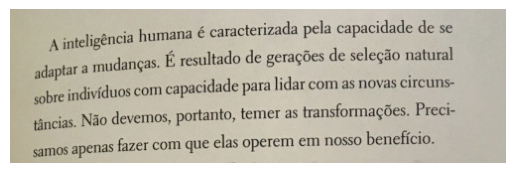

In [10]:
img = cv2.imread('./content/page-book.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# cv2.imshow(rgb)
plt.imshow(rgb)
plt.axis('off')
plt.show()

In [11]:
# config_tesseract = '--tessdata-dir ./tessdata --oem 3 --psm 6'  # psm: page segmentation mode
config_tesseract = '--tessdata-dir tessdata'
text = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(text)

A inteligência humana é caracterizada pela capacidade de se
adaptar a mudanças. É resultado de gerações de seleção natural
Sobre indivíduos com capacidade para lidar com as novas ciruns-
portanto, temer as transformações. Preci-

tâncias. Não devemos,
samos apenas fazer com que elas operem em nosso benefício.



In [ ]:
# 하나의 문단(블록), 여러 줄(line)과 여러 문장(sentence)이 연속적으로 있을 거라고 판단
config_tesseract = '--tessdata-dir tessdata --psm 6'
text = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(text)

A inteligência humana é caracterizada pela capacidade de se
adaptar a mudanças. É resultado de gerações de seleção natural
Sobre indivíduos com capacidade para lidar com as novas ciruns-
tâncias. Não devemos, portanto, temer as transformações. Preci-
samos apenas fazer com que elas operem em nosso benefício.



In [13]:
# Threat All Single Line (한 줄 문장이라 가정)
config_tesseract = '--tessdata-dir tessdata --psm 7'            
text = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(text)

ªâªªââª%%ã%ãâêâã%%?ª%ã



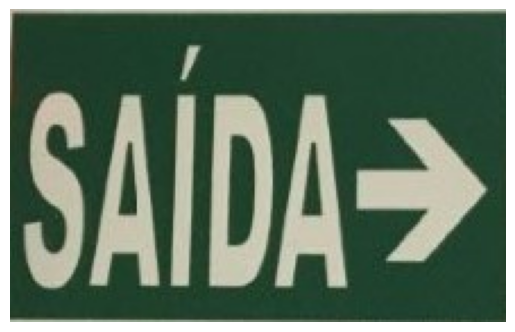

In [14]:
# exit.jpg
img = cv2.imread('./content/exit.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# cv2.imshow(rgb)
plt.imshow(rgb)
plt.axis('off')
plt.show()

In [15]:
# 7 : Threat All Single Line (한 줄 문장이라 가정)
config_tesseract = '--tessdata-dir tessdata --psm 7'
text = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(text)

SAÍDA>



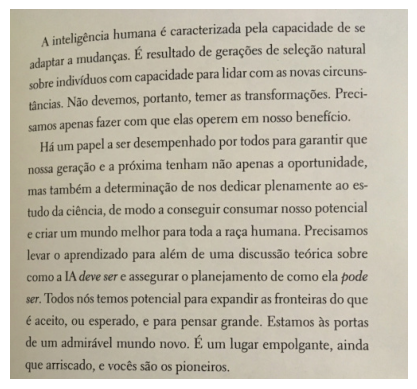

In [16]:
# Page Orientation
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('./content/book01.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
# OSD는 Orientation and Script Detection의 약자입니다
# 이미지를 분석해서 텍스트가 어느 방향(회전각)으로 놓여 있는지 (0도, 90도, 180도, 270도)
# 세로쓰기/가로쓰기 여부
# 어떤 문자 스크립트(라틴, 한글, 한자 등)로 쓰여 있는지

print(pytesseract.image_to_osd(img))

Page number: 0
Orientation in degrees: 0
Rotate: 0
Orientation confidence: 1.66
Script: Latin
Script confidence: 13.33



In [18]:
# Selection of Texts
from pytesseract import Output

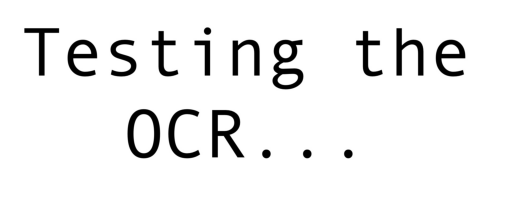

In [36]:
img = cv2.imread('./content/test01.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# cv2.imshow(rgb)
plt.imshow(rgb)
plt.axis('off')
plt.show()

In [37]:
config_tesseract = '--tessdata-dir tessdata'
result = pytesseract.image_to_data(rgb, config=config_tesseract, lang='eng+kor+kor_vert', output_type=Output.DICT)
result

{'level': [1, 2, 3, 4, 5, 5, 4, 5, 5],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1, 1, 1, 1, 1],
 'par_num': [0, 0, 1, 1, 1, 1, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1, 1, 2, 2, 2],
 'word_num': [0, 0, 0, 0, 1, 2, 0, 1, 2],
 'left': [0, 54, 54, 54, 54, 1298, 441, 441, 1034],
 'top': [0, 69, 69, 69, 69, 72, 375, 370, 526],
 'width': [1859, 1652, 1652, 1652, 1046, 408, 843, 514, 240],
 'height': [763, 489, 489, 231, 231, 180, 183, 239, 32],
 'conf': [-1, -1, -1, -1, 86, 92, -1, 88, 92],
 'text': ['', '', '', '', 'Testing', 'the', '', 'OCR.', '..']}

In [38]:
# extracted texts
result['text']

['', '', '', '', 'Testing', 'the', '', 'OCR.', '..']

In [39]:
def bounding_box(result, img, i, color=(255,100,0)):
    x = result['left'][i]
    y = result['top'][i]
    w = result['width'][i]
    h = result['height'][i]

    cv2.rectangle(img, (x,y), (x+w,y+h), color, 2)
    return x, y, img

86
92
88
92


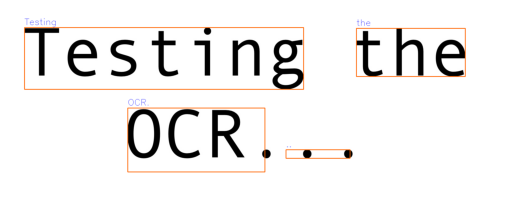

In [40]:
# 40% 이상 감지된 부분에 박스 표시해보기

min_confidence = 40             # minimum confidence level to consider a text valid (40% 이상 정확도만 해당하게)
img_copy = rgb.copy()
for idx in range(0, len(result['text'])):
    confidence = int(result['conf'][idx])
    if confidence > min_confidence:
        print(confidence)
        x, y, img = bounding_box(result, img_copy, idx)
        text = result['text'][idx]
        cv2.putText(img_copy, text, (x,y-10), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0, 0, 255))       # 글자 표시 (영어만 가능해서 밑에 폰트 추가버전 사용 권장...)
# cv2.imshow(img_copy)
plt.imshow(img_copy, cmap='gray')
plt.axis('off')
plt.show()

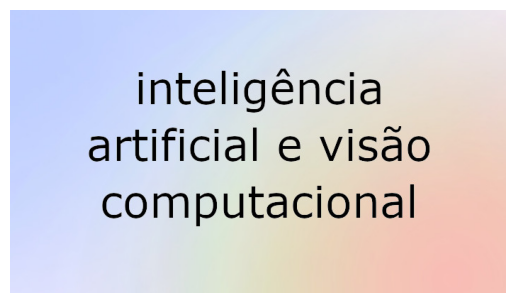

In [41]:
img = cv2.imread('./content/test02-02.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# cv2.imshow(rgb)
plt.imshow(rgb)
plt.axis('off')
plt.show()

In [42]:
# 추출 정보 확인
config_tesseract = '--tessdata-dir tessdata'
result = pytesseract.image_to_data(rgb, config=config_tesseract, lang='por', output_type=Output.DICT)
result

{'level': [1, 2, 3, 4, 5, 4, 5, 5, 5, 4, 5],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'par_num': [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1, 2, 2, 2, 2, 3, 3],
 'word_num': [0, 0, 0, 0, 1, 0, 1, 2, 3, 0, 1],
 'left': [0, 111, 111, 182, 182, 111, 111, 380, 437, 130, 130],
 'top': [0, 84, 84, 84, 84, 165, 167, 179, 165, 247, 247],
 'width': [700, 481, 481, 341, 341, 481, 237, 30, 155, 440, 440],
 'height': [400, 222, 222, 62, 62, 50, 48, 36, 50, 59, 59],
 'conf': [-1, -1, -1, -1, 91, -1, 88, 93, 91, -1, 90],
 'text': ['',
  '',
  '',
  '',
  'inteligência',
  '',
  'artificial',
  'e',
  'visão',
  '',
  'computacional']}

In [43]:
# 전용 폰트 적용
from PIL import ImageFont, ImageDraw, Image
import numpy as np
# font = './fonts/calibri.ttf'
font = './fonts/NotoSansKR-Regular.ttf'

In [44]:
# 원하는 폰트로 텍스트 기록 (한글, 특수문자 가능)
def write_text(text, x, y, img, font, font_size=32):
    font = ImageFont.truetype(font, font_size)
    img_pil = Image.fromarray(img)
    draw = ImageDraw.Draw(img_pil)
    draw.text((x, y - font_size), text, font=font)
    img = np.array(img_pil)
    return img

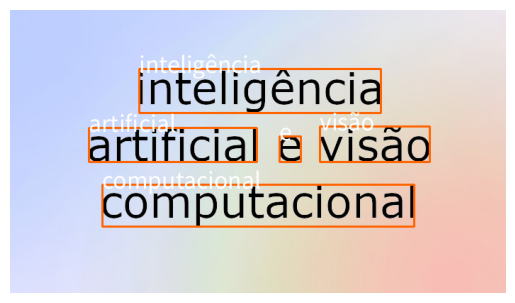

In [45]:
# 특수문자는 cv2 폰트에서 깨짐 (FONT_HERSHEY_SIMPLEX)

min_confidence = 40
img_copy = rgb.copy()
for idx in range(0, len(result['text'])):
    confidence = int(result['conf'][idx])
    if confidence > min_confidence:
        x, y, img = bounding_box(result, img_copy, idx)
        text = result['text'][idx]
        # cv2.putText(img_copy, text, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0, 0, 255))
        img_copy = write_text(text, x, y, img_copy, font)           # 원하는 폰트로 텍스트 기록
# cv2.imshow(img_copy)
plt.imshow(img_copy)
plt.axis('off')
plt.show()


In [ ]:
# 정규식을 사용해서 원하는 문자만 리스트로 추출한다

import re           # regular expressions

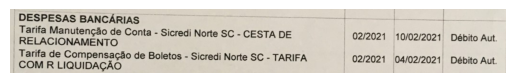

In [ ]:
img = cv2.imread('./content/table_test.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(rgb, cmap='gray')
plt.axis('off')
plt.show()

In [50]:
result = pytesseract.image_to_data(rgb, config=config_tesseract, lang='por', output_type=Output.DICT)
result

{'level': [1,
  2,
  3,
  4,
  5,
  5,
  2,
  3,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  4,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  2,
  3,
  4,
  5,
  5,
  5],
 'page_num': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 'block_num': [0,
  1,
  1,
  1,
  1,
  1,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  3,
  3,
  3,
  3,
  3,
  3],
 'par_num': [0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  

In [55]:
# 정규식 https://regexr.com/
# 찾고자 하는 데이터 패턴
date_pattern = '^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[012])/(19|20)\d\d$'

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_21672\1121900277.py:3: SyntaxWarning: invalid escape sequence '\d'
  date_pattern = '^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[012])/(19|20)\d\d$'


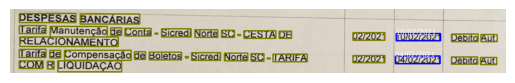

In [ ]:
dates = []              # 찾은 날짜를 담을 리스트

min_confidence = 40
img_copy = rgb.copy()
for idx in range(0, len(result['text'])):
    confidence = int(result['conf'][idx])
    if confidence > min_confidence:
        text = result['text'][idx]
        # 정규식과 같은 부분만 표시 (찾은 것 중에서)
        if re.match(date_pattern, text):
            x, y, img = bounding_box(result, img_copy, idx, (0, 0, 255))
            img_copy = write_text(text, x, y, img_copy, font, 16)           # 원하는 폰트로 텍스트 기록
            dates.append(text)
        else:
            x, y, img_copy = bounding_box(result, img_copy, idx, (125, 125, 0))
        
# cv2.imshow(img_copy)
plt.imshow(img_copy)
plt.axis('off')
plt.show()

In [62]:
dates

['10/02/2021', '04/02/2021']

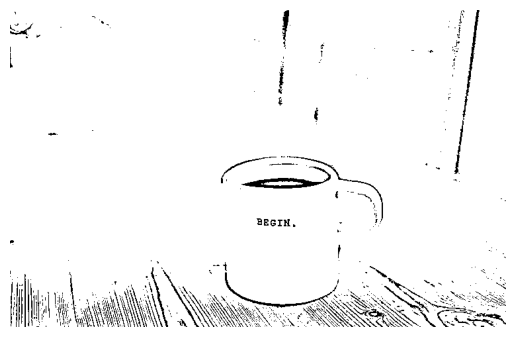

In [87]:
# img = Image.open('./content/cup.jpg')
# img_cv = np.array(img)
img = cv2.imread('./content/cup.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, 8)

plt.imshow(thresh, cmap='gray')
plt.axis('off')
plt.show()

In [100]:
import pytesseract
from pytesseract import Output

# --psm 6 : 여러줄로 구성된 하나의 문단
config_tesseract = '--tessdata-dir tessdata --psm 6'
result = pytesseract.image_to_data(thresh, lang='eng', output_type=Output.DICT, config=config_tesseract)
result

{'level': [1, 2, 3, 4, 5, 5, 5, 4, 5, 5, 5, 5, 5],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'par_num': [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
 'word_num': [0, 0, 0, 0, 1, 2, 3, 0, 1, 2, 3, 4, 5],
 'left': [0, 0, 0, 58, 58, 460, 685, 0, 0, 373, 495, 551, 747],
 'top': [0, 149, 149, 149, 187, 149, 165, 308, 349, 316, 322, 308, 374],
 'width': [750, 749, 750, 629, 12, 6, 2, 749, 6, 59, 7, 5, 2],
 'height': [480, 227, 227, 42, 4, 19, 2, 68, 5, 13, 54, 15, 2],
 'conf': [-1, -1, -1, -1, 46, 38, 42, -1, 62, 62, 51, 5, 79],
 'text': ['', '', '', '', ']', '§', 'J', '', '-', 'BEGIM.', ';', '¥', '|']}

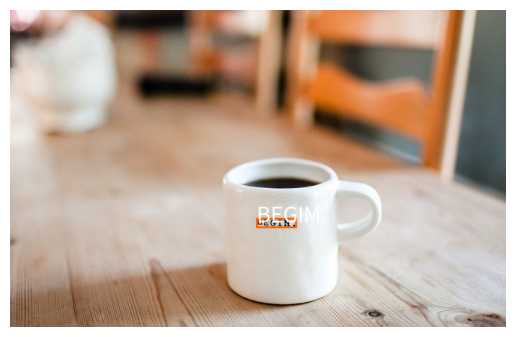

In [97]:
min_confidence = 40
img_copy = rgb.copy()
for idx in range(0, len(result['text'])):
    confidence = int(result['conf'][idx])
    if confidence > min_confidence:
        text = result['text'][idx]
        # 글자가 나왔을때만 표기
        if not text.isspace() and len(text) >= 2:
            x, y, img = bounding_box(result, img_copy, idx)
            # cv2.putText(img_copy, text, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0, 0, 255))
            img_copy = write_text(text, x, y, img_copy, font)           # 원하는 폰트로 텍스트 기록
# cv2.imshow(img_copy)
plt.imshow(img_copy)
plt.axis('off')
plt.show()

In [93]:
result['conf']

[-1, -1, -1, -1, 0, 41, -1, 89, 0, 0, 38]

In [94]:
result['text']

['', '', '', '', ';', 'F', '', 'BEGIN,', ';', 'B', '|']